In [ ]:
pip install opencv-python

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from skimage import io,measure
from scipy import ndimage as nd
from skimage.color import label2rgb

[ 9 21  0]
[175 255 255]


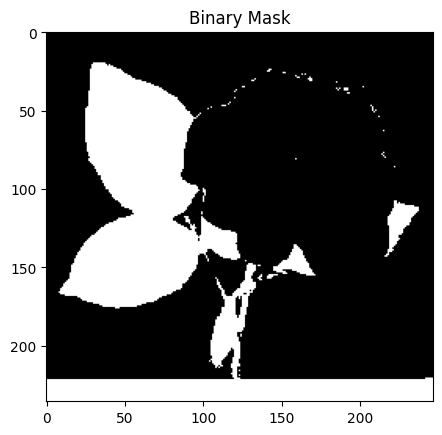

In [33]:
i=input("enter the image path:")
img = io.imread(i)
plt.imshow(img)

# A required callback method that goes into the trackbar function.
def nothing(x):
    pass

# Load the image from a file
#image_path = "your_image_file.jpg"  # Specify the path to your image
frame = cv2.imread(i)

if frame is None:
    print("Error loading image")
    exit()

# Create a window named trackbars.
cv2.namedWindow("Trackbars")

# Create 6 trackbars that will control the lower and upper range of H, S and V channels.
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)

while True:
    # Convert the BGR image to HSV image.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Get the new values of the trackbar in real time as the user changes them
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")

    # Set the lower and upper HSV range according to the value selected by the trackbar
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])

    # Create a mask using the specified HSV range
    mask = cv2.inRange(hsv, lower_range, upper_range)

    # Visualize the real part of the target color (Optional)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Converting the binary mask to a 3-channel image
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Stack the mask, original frame, and the filtered result
    stacked = np.hstack((mask_3, frame, res))

    # Show this stacked frame at 40% of the size.
    cv2.imshow('Trackbars', cv2.resize(stacked, None, fx=0.4, fy=0.4))

    # If the user presses ESC then exit the program
    key = cv2.waitKey(1)
    if key == 27:  # ESC key
        break


print(lower_range)
print(upper_range)
# Display the final mask using matplotlib
plt.imshow(mask, cmap='gray')
plt.title('Binary Mask')
#plt.axis('off')  # Hide axis
plt.show()

# Destroy the windows.
cv2.destroyAllWindows()


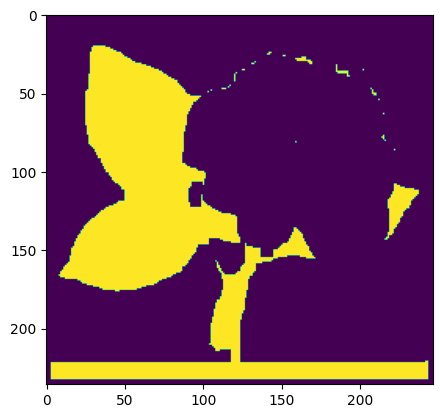

In [34]:
closed_mask=nd.binary_closing(mask,np.ones((7,7)))
plt.imshow(closed_mask)


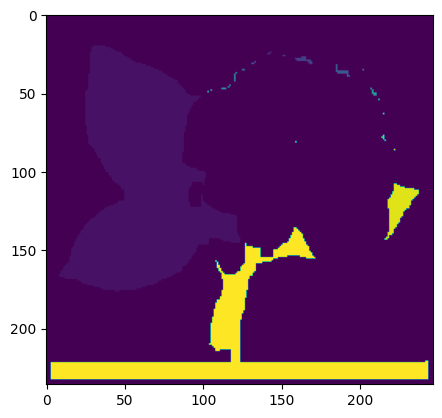

In [35]:
label=measure.label(closed_mask)
plt.imshow(label)

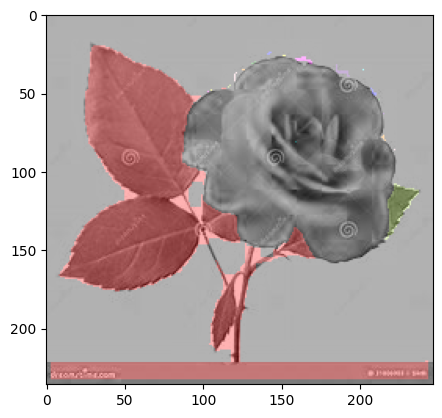

In [36]:
img_label=label2rgb(label,image=img)
plt.imshow(img_label)

In [37]:
from skimage import measure
import pandas as pd

props = measure.regionprops_table(label, img,
                                   properties=['label', 'area', 'equivalent_diameter', 'mean_intensity', 'solidity'])
df = pd.DataFrame(props)
print(df.head())


   label    area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0      1  9626.0           110.707741        108.118741        134.709433   
1      2     4.0             2.256758        219.250000        255.000000   
2      3     2.0             1.595769        255.000000        225.000000   
3      4    24.0             5.527906        233.916667        217.625000   
4      5     3.0             1.954410        242.666667        211.000000   

   mean_intensity-2  solidity  
0         56.415437  0.751738  
1        254.750000  1.000000  
2        229.500000  1.000000  
3        218.291667  0.685714  
4        220.666667  0.750000  
